In [2]:
import pandas as pd

# Load the file 
df = pd.read_csv("C:/Users/HP/Downloads/car_sales.csv")

In [3]:
df.head()

,Date,Customer Name,Dealer_Name,Company,Model,Year,Body Style,Engine,Transmission,Color,Price in thousands,Dealer_Add,Customer Address,CouncilArea,Phone,Gender,Annual Income,Dealer_Location,Dealer_No,Dealer_Region
0,9/3/2016,Geraldine,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,2015,SUV,DoubleÂ Overhead Camshaft,Auto,Black,26,44 Walnut St,68 Studley St,Yarra City Council,8264678,Male,13500,44 Walnut St,06457-3834,Middletown
1,12/3/2016,Gia,C & M Motors Inc,Dodge,Durango,2015,SUV,DoubleÂ Overhead Camshaft,Auto,Black,19,4333 Ogden Ave,85 Turner St,Yarra City Council,6848189,Male,1480000,4333 Ogden Ave,60504-7114,Aurora
2,2/4/2016,Gianna,Capitol KIA,Cadillac,Eldorado,2015,Passenger,Overhead Camshaft,Manual,Red,31,3 Green Tree Trl,25 Bloomburg St,Yarra City Council,7298798,Male,1035000,3 Green Tree Trl,38701-8047,Greenville
3,2/4/2016,Giselle,Chrysler of Tri-Cities,Toyota,Celica,2016,SUV,Overhead Camshaft,Manual,Pale White,14,3203 W Marie St,18/659 Victoria St,Yarra City Council,6257557,Male,13500,3203 W Marie St,99301-3882,Pasco
4,3/4/2017,Grace,Chrysler Plymouth,Acura,TL,2015,Hatchback,DoubleÂ Overhead Camshaft,Auto,Red,24,6137 S Us-51,5 Charles St,Yarra City Council,7081483,Male,1465000,6137 S Us-51,53546-9427,Janesville


In [4]:
# Sum of Price by Dealer_Name
sales_by_dealer = df.groupby('Dealer_Name')['Price in thousands'].sum().sort_values(ascending=False)
print(sales_by_dealer)

Dealer_Name
Progressive Shippers Cooperative Association No    53830
Rabun Used Car Sales                               53677
U-Haul CO                                          51434
Suburban Ford                                      51031
Star Enterprises Inc                               50962
Ryder Truck Rental and Leasing                     50862
Saab-Belle Dodge                                   50830
Scrivener Performance Engineering                  50670
Race Car Help                                      50494
Tri-State Mack Inc                                 50250
Iceberg Rentals                                    25751
Enterprise Rent A Car                              25640
Classic Chevy                                      25577
Chrysler of Tri-Cities                             25544
New Castle Ford Lincoln Mercury                    25503
C & M Motors Inc                                   25497
Diehl Motor CO Inc                                 25496
Nebo Chevrolet     

In [5]:
sales_by_model = df.groupby('Model')['Price in thousands'].sum().sort_values(ascending=False)
print(sales_by_model)

Model
LS400            20594
Jetta            18405
Silhouette       17809
Montero Sport    15863
Ram Pickup       15545
                 ...  
Alero              510
Avalon             450
RX300              450
Mirage             261
Sebring Conv.      240
Name: Price in thousands, Length: 154, dtype: int64


In [6]:
avg_price_by_year = df.groupby('Year')['Price in thousands'].mean().sort_index()
print(avg_price_by_year)

Year
2014    24.333333
2015    26.815321
2016    28.840000
Name: Price in thousands, dtype: float64


<Axes: title={'center': 'Sales Over Time'}, xlabel='Date', ylabel='Total Sales (Thousands)'>

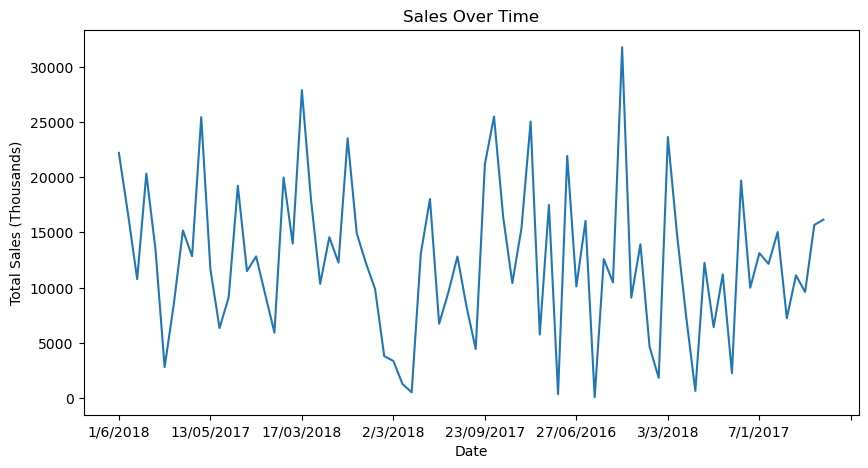

In [8]:
 # Convert if not already datetime
sales_over_time = df.groupby('Date')['Price in thousands'].sum()
sales_over_time.plot(kind='line', figsize=(10,5), title='Sales Over Time', ylabel='Total Sales (Thousands)')

In [9]:
sales_by_gender = df.groupby('Gender')['Price in thousands'].sum()
print(sales_by_gender)

Gender
Female    230721
Male      740686
Name: Price in thousands, dtype: int64


In [10]:
color_counts = df['Color'].value_counts()
print(color_counts)

Color
Pale White    11775
Red           11498
Black         11459
Name: count, dtype: int64


In [11]:
# Example: Create income bins
bins = [0, 30000, 60000, 90000, 120000, 150000, 200000]
labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']

df['Income Group'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, right=False)

avg_price_by_income = df.groupby('Income Group')['Price in thousands'].mean()
print(avg_price_by_income)

Income Group
0-30k        27.841356
30k-60k            NaN
60k-90k      43.000000
90k-120k     57.000000
120k-150k    17.500000
150k+        15.833333
Name: Price in thousands, dtype: float64


In [12]:
sales_by_region = df.groupby('Dealer_Region')['Price in thousands'].sum()
print(sales_by_region)

Dealer_Region
Aurora        127470
Austin        152633
Greenville    126817
Janesville    155912
Middletown    126997
Pasco         126878
Scottsdale    154700
Name: Price in thousands, dtype: int64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("C:/Users/HP/Downloads/car_sales.csv")

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for missing values
print(df.isnull().sum())

# Drop rows with critical missing values (for example, Date or Price)
df = df.dropna(subset=['Date', 'Price in thousands'])

# Fill or drop less critical missing values
df['Gender'] = df['Gender'].fillna('Unknown')
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

# Remove duplicates if any
df = df.drop_duplicates()

# Strip whitespace from string columns (to avoid subtle mismatches)
str_cols = df.select_dtypes(include='object').columns
for col in str_cols:
    df[col] = df[col].str.strip()

print("Data cleaned. Here’s a summary:")
print(df.info())

Date                  21391
Customer Name             2
Dealer_Name               0
Company                   0
Model                     0
Year                      0
Body Style                0
Engine                    0
Transmission              0
Color                     0
Price in thousands        0
Dealer_Add                0
Customer Address          0
CouncilArea               3
Phone                     0
Gender                    0
Annual Income             0
Dealer_Location           0
Dealer_No                 0
Dealer_Region             0
dtype: int64
Data cleaned. Here’s a summary:
<class 'pandas.core.frame.DataFrame'>
Index: 13341 entries, 0 to 32318
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                13341 non-null  datetime64[ns]
 1   Customer Name       13341 non-null  object        
 2   Dealer_Name         13341 non-null  object        
 3   Compan

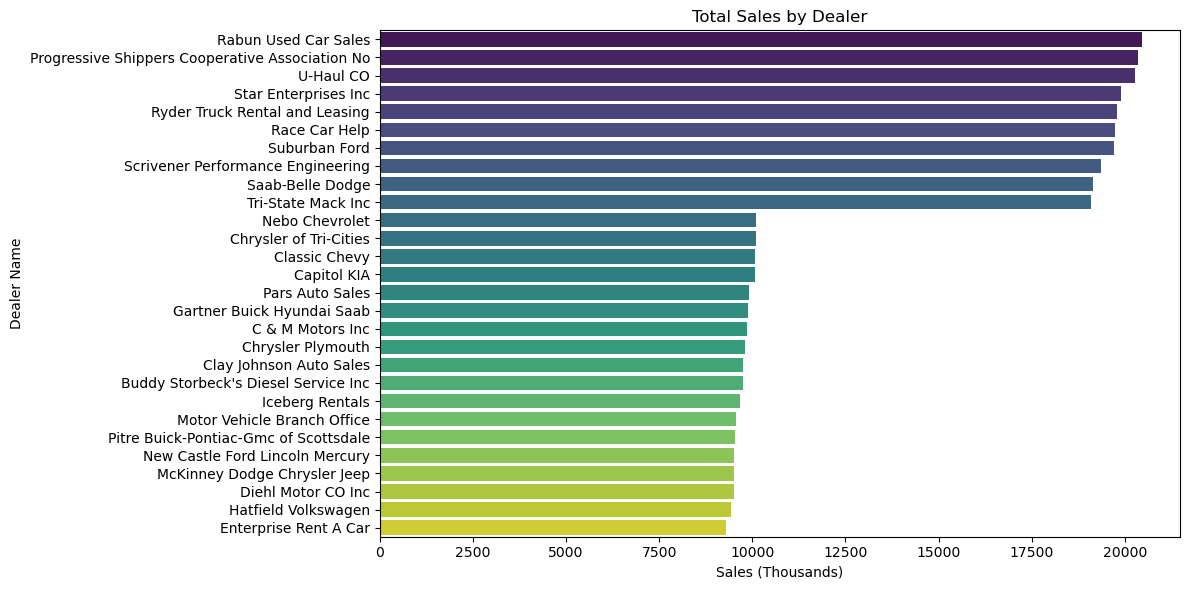

In [15]:
sales_by_dealer = df.groupby('Dealer_Name')['Price in thousands'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_dealer.values, y=sales_by_dealer.index, palette='viridis')
plt.title('Total Sales by Dealer')
plt.xlabel('Sales (Thousands)')
plt.ylabel('Dealer Name')
plt.tight_layout()
plt.show()

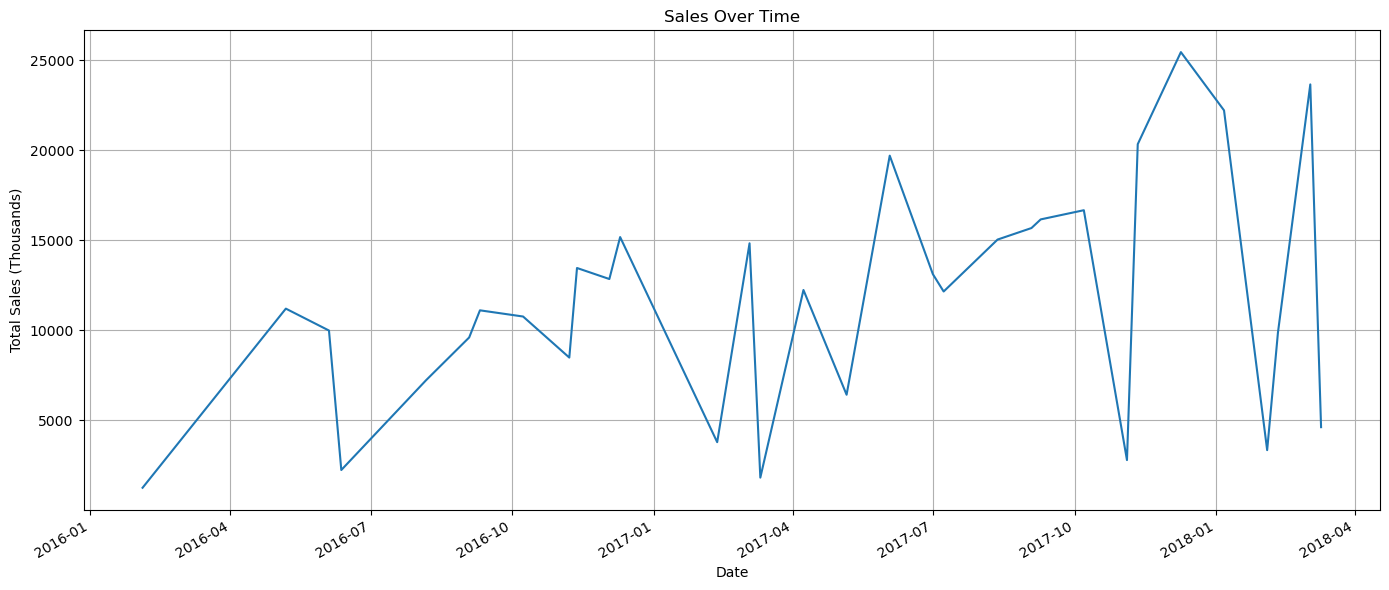

In [16]:
sales_over_time = df.groupby('Date')['Price in thousands'].sum()

plt.figure(figsize=(14,6))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (Thousands)')
plt.grid(True)
plt.tight_layout()
plt.show()

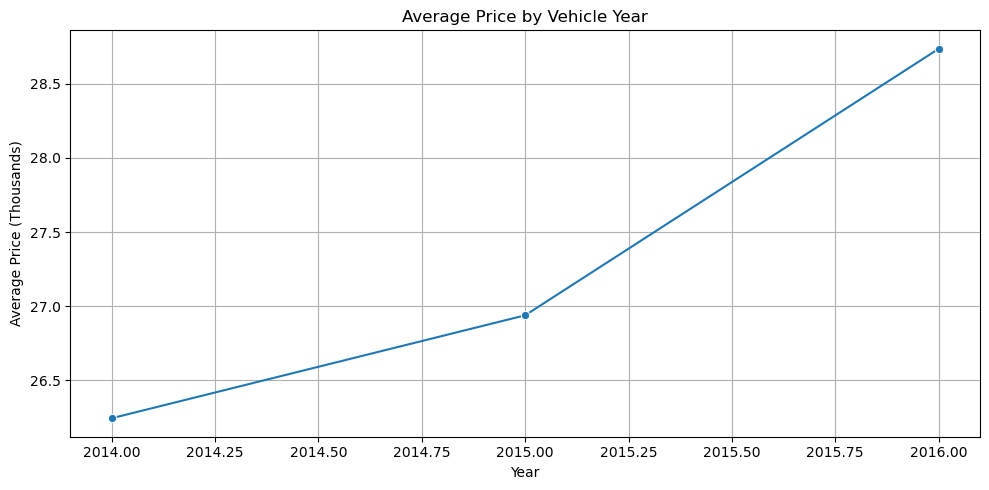

In [17]:
avg_price_by_year = df.groupby('Year')['Price in thousands'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o')
plt.title('Average Price by Vehicle Year')
plt.xlabel('Year')
plt.ylabel('Average Price (Thousands)')
plt.grid(True)
plt.tight_layout()
plt.show()

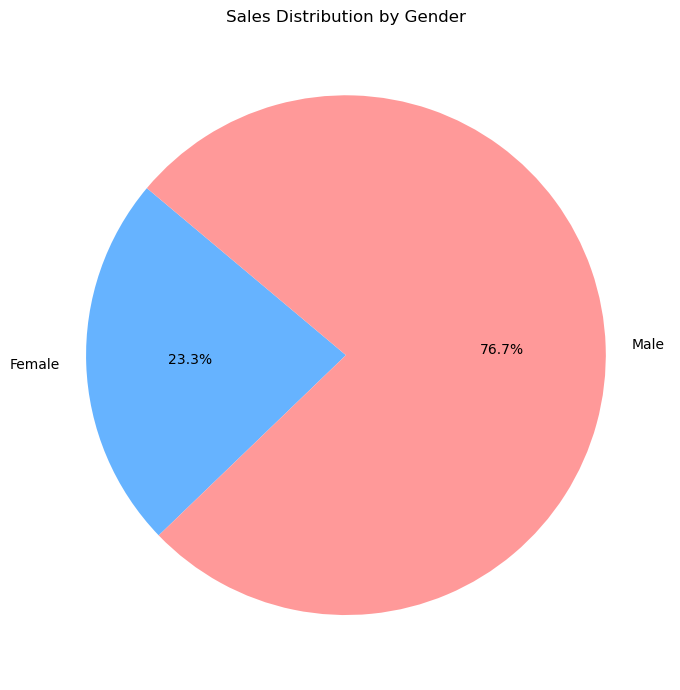

In [18]:
sales_by_gender = df.groupby('Gender')['Price in thousands'].sum()

plt.figure(figsize=(7,7))
sales_by_gender.plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'], startangle=140)
plt.title('Sales Distribution by Gender')
plt.ylabel('')
plt.tight_layout()
plt.show()

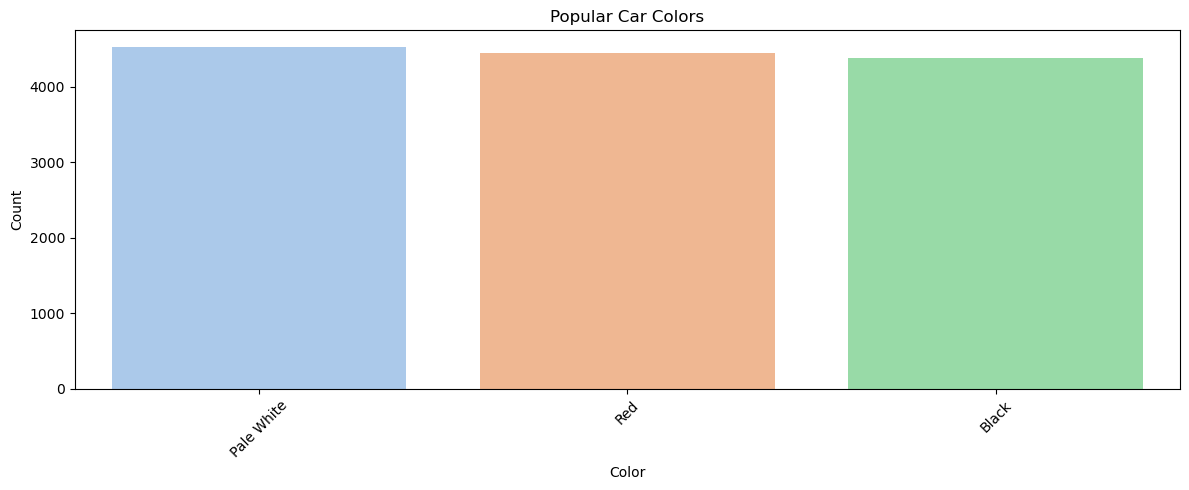

In [19]:
color_counts = df['Color'].value_counts()

plt.figure(figsize=(12,5))
sns.barplot(x=color_counts.index, y=color_counts.values, palette='pastel')
plt.title('Popular Car Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

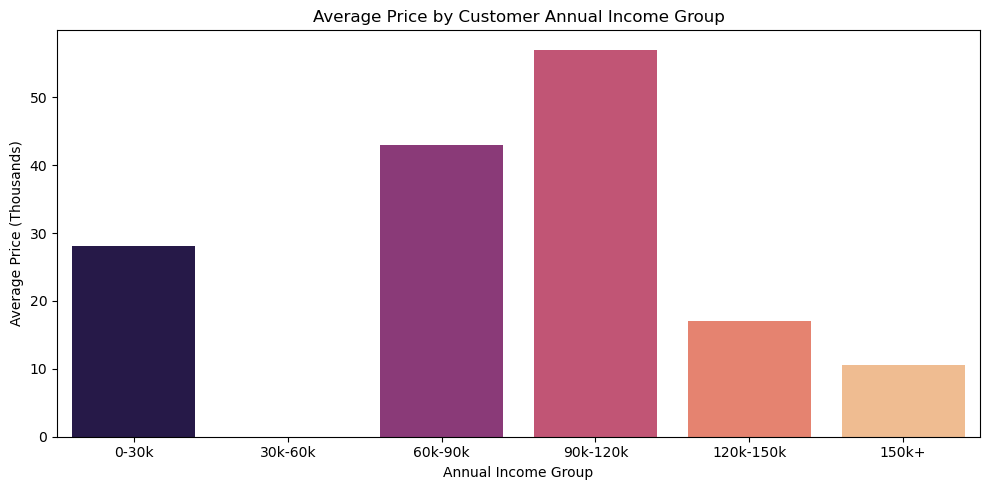

In [20]:
bins = [0, 30000, 60000, 90000, 120000, 150000, 200000]
labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']

df['Income Group'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, right=False)

avg_price_by_income = df.groupby('Income Group')['Price in thousands'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette='magma')
plt.title('Average Price by Customer Annual Income Group')
plt.xlabel('Annual Income Group')
plt.ylabel('Average Price (Thousands)')
plt.tight_layout()
plt.show()

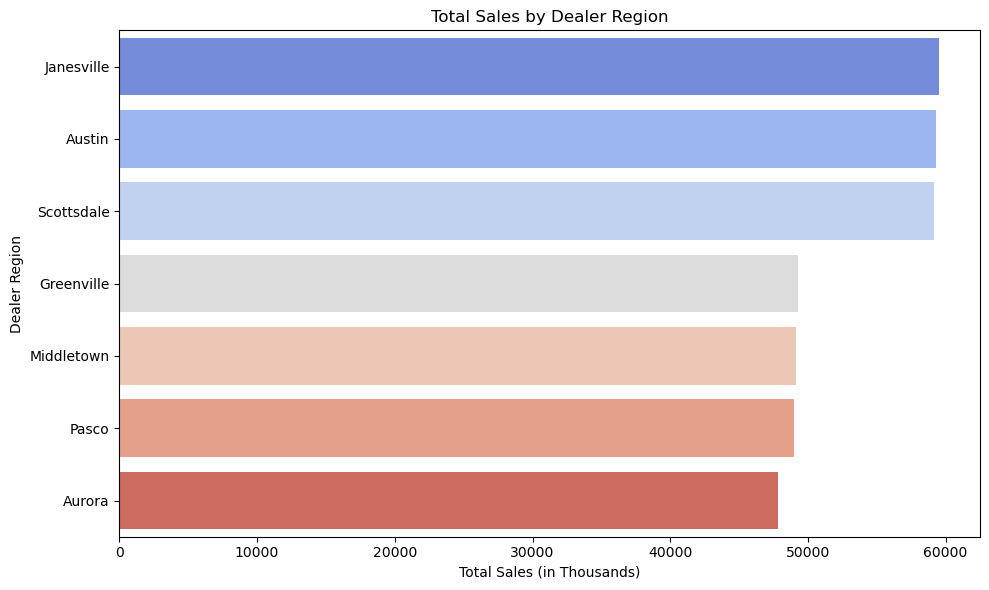

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by region
sales_by_region = df.groupby('Dealer_Region')['Price in thousands'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_region.values, y=sales_by_region.index, palette='coolwarm')

plt.title('Total Sales by Dealer Region')
plt.xlabel('Total Sales (in Thousands)')
plt.ylabel('Dealer Region')
plt.tight_layout()
plt.show()

In [22]:
print(sales_by_region)

Dealer_Region
Janesville    59516
Austin        59329
Scottsdale    59123
Greenville    49241
Middletown    49133
Pasco         48966
Aurora        47812
Name: Price in thousands, dtype: int64
